## Efficiency and Productivity Throught Python
Consider s&P 500 index values, where we want to analyze historical index levels for, say, a few years to see how the volatility of the index has fluctuated over time and hope to find evidence that volatility, in contrast to some typical model assumptions, fluctuates over time and is far from being constant.
The result should also be visualised. 
We mainly have to do the following:
* Retrieve index level data from the web
* Calculate the annualized rolling Standard Deviation of the log returns (Volatility)
* Plot the index level data and the volatility results


In [141]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
import yfinance as yf
import numpy as np
import pandas as pd
from pylab import plt, mpl

In [143]:
# Plot Style
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

<ipython-input-143-01adf45c7166>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [144]:
SP500 = yf.download("^GSPC", start = "2010-01-04", end = "2018-06-29")

[*********************100%***********************]  1 of 1 completed


In [145]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [146]:
SP500.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-22,2760.790039,2764.169922,2752.679932,2754.879883,2754.879883,5468110000
2018-06-25,2742.939941,2742.939941,2698.669922,2717.070068,2717.070068,3663280000
2018-06-26,2722.120117,2732.909912,2715.600098,2723.060059,2723.060059,3568900000
2018-06-27,2728.449951,2746.090088,2699.379883,2699.629883,2699.629883,3803990000
2018-06-28,2698.689941,2724.340088,2691.989990,2716.310059,2716.310059,3461100000


In [147]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2137 entries, 2010-01-04 to 2018-06-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2137 non-null   float64
 1   High       2137 non-null   float64
 2   Low        2137 non-null   float64
 3   Close      2137 non-null   float64
 4   Adj Close  2137 non-null   float64
 5   Volume     2137 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 116.9 KB


In [148]:
SP500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2018-06-22,2760.790039,2764.169922,2752.679932,2754.879883,2754.879883,5468110000
2018-06-25,2742.939941,2742.939941,2698.669922,2717.070068,2717.070068,3663280000
2018-06-26,2722.120117,2732.909912,2715.600098,2723.060059,2723.060059,3568900000


In [149]:
SP500 = SP500.Close.to_frame()

In [150]:
SP500.head()

,Close
Date,
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941
2010-01-08,1144.979980


In [151]:
SP500

,Close
Date,
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941
2010-01-08,1144.979980
...,...
2018-06-22,2754.879883
2018-06-25,2717.070068
2018-06-26,2723.060059


In [152]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

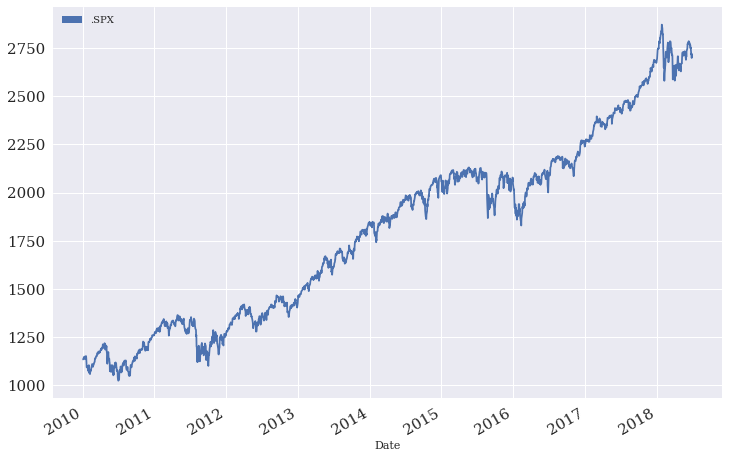

In [153]:
ax = SP500.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
name = mpatches.Patch(label='.SPX')
ax.legend(handles=[name])
plt.show()

In [154]:
SP500['rets'] = np.log(SP500 / SP500.shift(1))

In [155]:
# Calculate Volatility
SP500['vola'] = SP500['rets'].rolling(252).std() * np.sqrt(252)

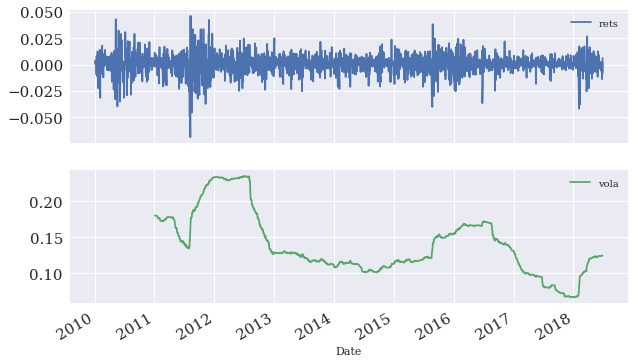

In [156]:
SP500[['rets', 'vola']].plot(subplots=True, figsize=(10, 6), fontsize= 15);